In [ ]:
import numpy as np

# y=wx + b
def perceptron(x, w, b):
    return 1 if np.dot(w, x) + b >= 0 else 0

# input x1, x2
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
AND_outputs = [0, 0, 0, 1]
OR_outputs = [0, 1, 1, 1]
NAND_outputs = [1, 1, 1, 0]

NOT_inputs = np.array([[0], [1]])
NOT_outputs = [1, 0]

# weight and bias
weights_AND = [1, 1]
bias_AND = -1.5

weights_OR = [1, 1]
bias_OR = -0.5

weights_NAND = [-1, -1]
bias_NAND = 1.5

weights_NOT = [-1]
bias_NOT = 0.5

# AND gate
print("AND Gate Outputs:")
for x in inputs:
    print(f"Input: {x}, Output: {perceptron(x, weights_AND, bias_AND)}")

# OR gate
print("\nOR Gate Outputs:")
for x in inputs:
    print(f"Input: {x}, Output: {perceptron(x, weights_OR, bias_OR)}")

# NAND gate
print("\nNAND Gate Outputs:")
for x in inputs:
    print(f"Input: {x}, Output: {perceptron(x, weights_NAND, bias_NAND)}")

# NOT gate
print("\nNOT Gate Outputs:")
for x in np.array([[0], [1]]):
    print(f"Input: {x}, Output: {perceptron(x, weights_NOT, bias_NOT)}")


a) Offline calculation

C:\Users\ZHANG\AppData\Local\Temp\ipykernel_4700\1394868587.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
C:\Users\ZHANG\AppData\Local\Temp\ipykernel_4700\1394868587.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 1].legend()


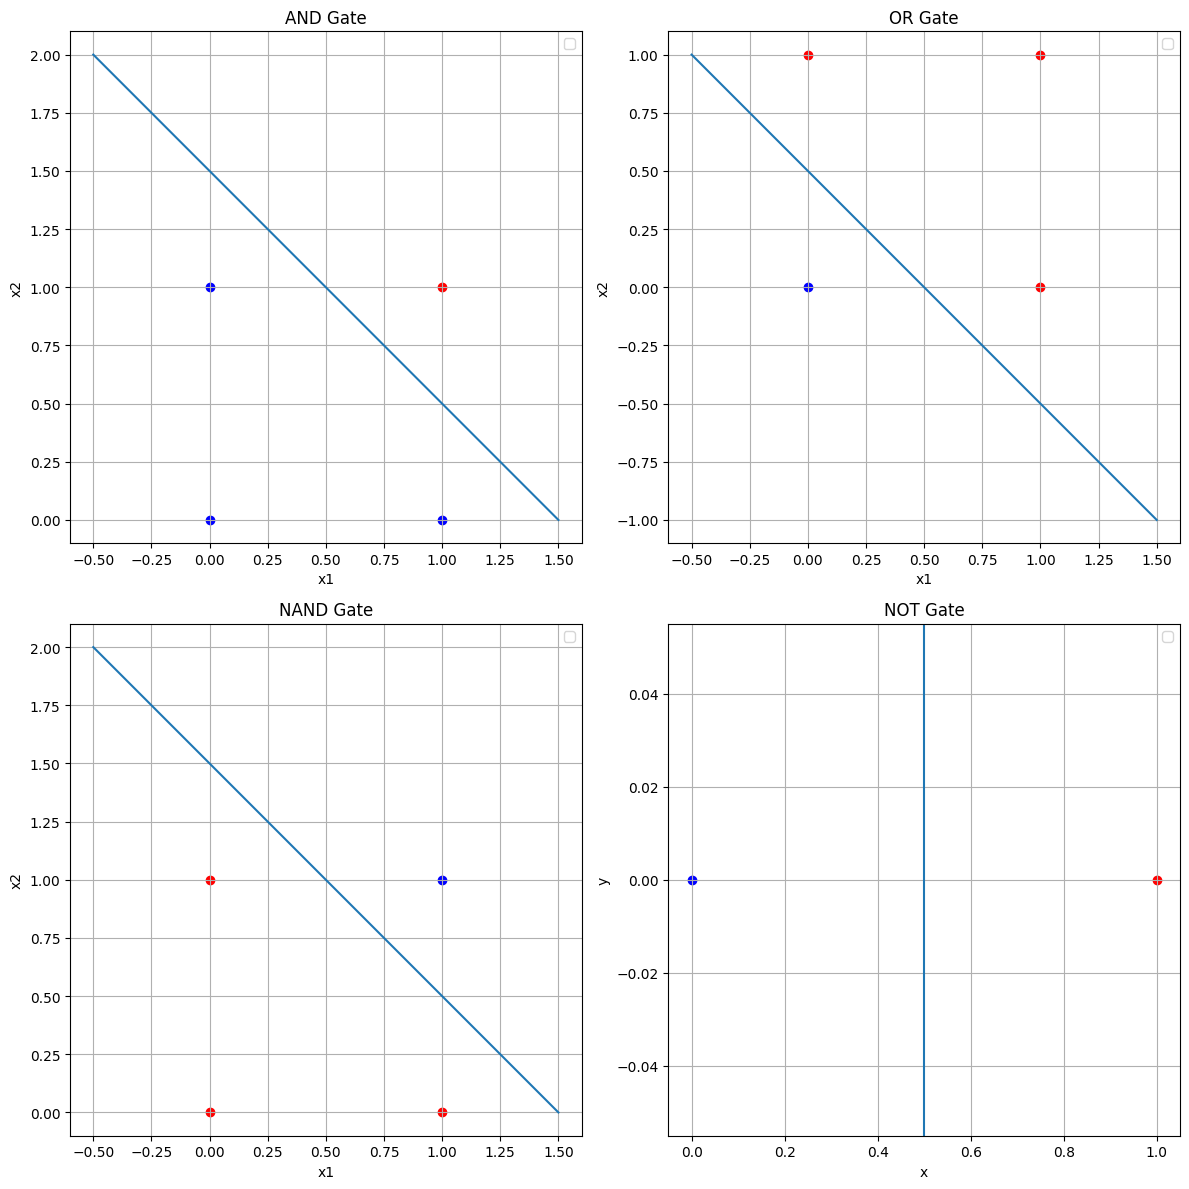

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# decision boundary
def plot_decision_boundary(weights, bias, inputs, title, ax):
    w = np.array(weights)
    a = w[0] / w[1]
    b = -bias / w[1]
    x = np.array([-0.5, 0, 1, 1.5])

    for x_inputs in inputs:
        outs = perceptron(x_inputs, weights, bias)
        if outs == 1:
            ax.scatter(x_inputs[0], x_inputs[1], color='red')
        else :
            ax.scatter(x_inputs[0], x_inputs[1], color='blue')
    ax.plot(x, -(a * x) + b)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.legend()
    ax.set_title(title)
    ax.grid(True)

# outputs

# 创建子图
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# AND Gate
plot_decision_boundary(weights_AND, bias_AND, inputs, 
                       title='AND Gate', ax=axs[0, 0])

# OR Gate
plot_decision_boundary(weights_OR, bias_OR, inputs, 
                       title='OR Gate', ax=axs[0, 1])

# NAND Gate
plot_decision_boundary(weights_NAND, bias_NAND, inputs, 
                       title='NAND Gate', ax=axs[1, 0])

# NOT Gate 
x = np.array([0, 1])
y = np.array([0, 1])
axs[1, 1].axvline(0.5)
axs[1, 1].scatter(0, 0, color='b')
axs[1, 1].scatter(1, 0, color='r')
axs[1, 1].set_title('NOT Gate')
axs[1, 1].set_xlabel("x")
axs[1, 1].set_ylabel("y")
axs[1, 1].grid(True)
axs[1, 1].legend()

plt.tight_layout()
plt.savefig("Q3 a")
plt.show()


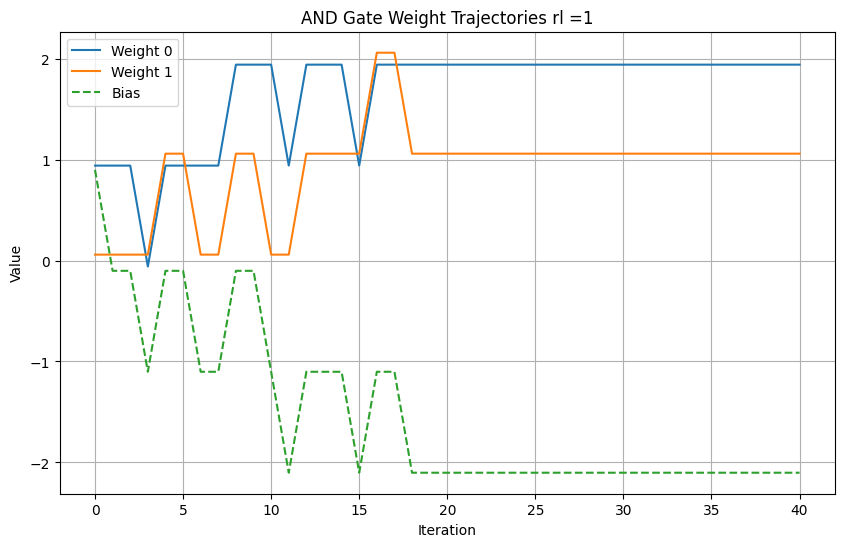

weights_AND:  [1.94047706 1.0586717 ]
bias_AND:  -2.1018261416171637


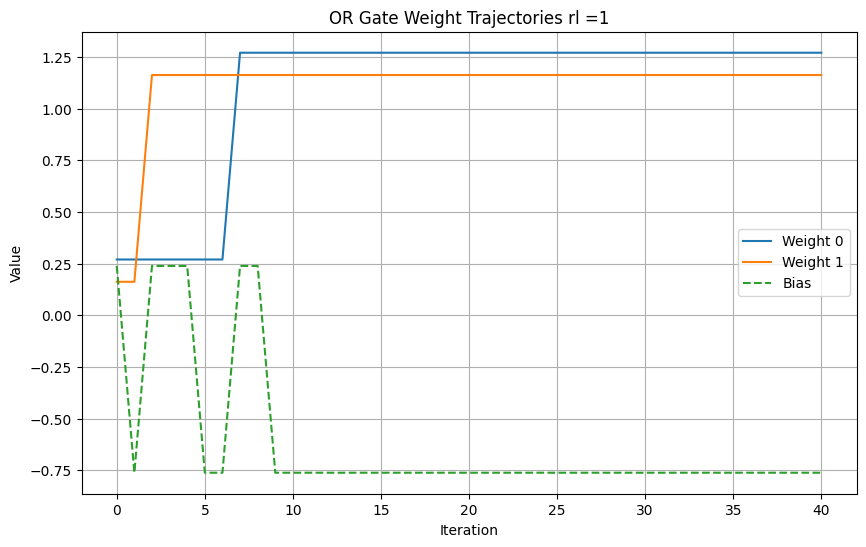

weights_OR:  [1.2699839  1.16212494]
bias_OR:  -0.7612982802735413


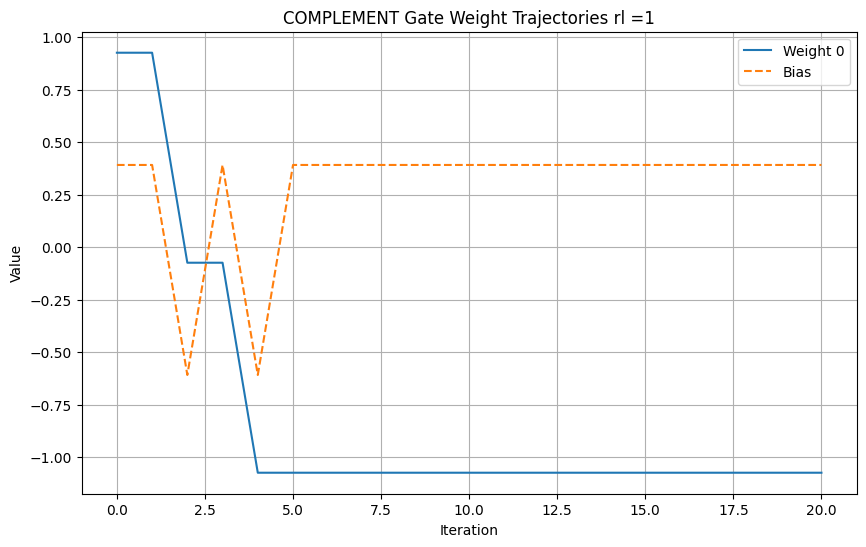

weights_NOT:  [-1.07422782]
bias_NOT:  0.3913130109791202


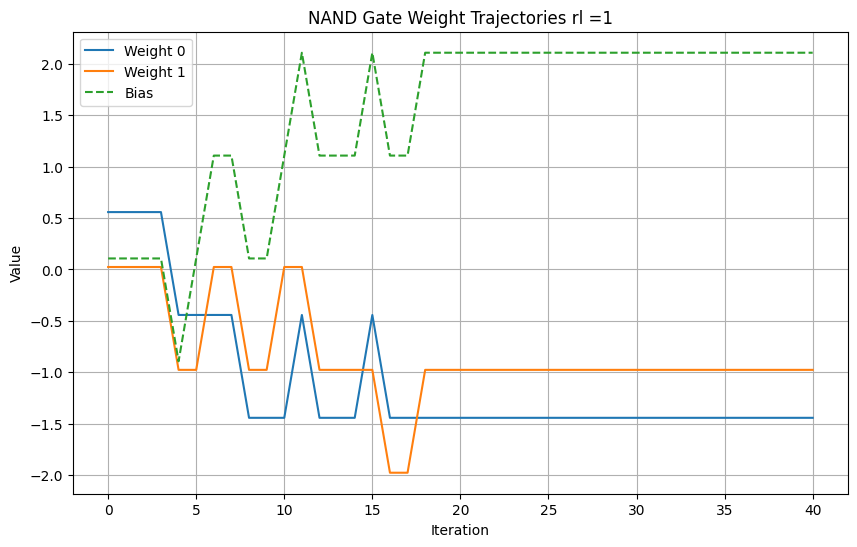

weights_NAND:  [-1.4429262  -0.97668905]
bias_NAND:  2.106427177616652


In [10]:
import matplotlib.pyplot as plt

# update
def train_perceptron(inputs, outputs, learning_rate, epochs):
    weights = np.random.rand(inputs.shape[1])
    bias = np.random.rand()
    weight_history = [weights.copy()]
    bias_history = [bias]
    
    for epoch in range(epochs):
        for x, y_true in zip(inputs, outputs):
            y_pred = perceptron(x, weights, bias)
            error = y_true - y_pred
            weights += learning_rate * error * x
            bias += learning_rate * error
            weight_history.append(weights.copy())
            bias_history.append(bias)
    return weights, bias, weight_history, bias_history

# plot
def plot_weight_trajectories(weight_history, bias_history, title):
    weight_history = np.array(weight_history)
    plt.figure(figsize=(10, 6))
    for i in range(weight_history.shape[1]):
        plt.plot(weight_history[:, i], label=f'Weight {i}')
    plt.plot(bias_history, label='Bias', linestyle='--')
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# parameters
epochs = 10
learning_rate = 1

# AND gate
weights_AND, bias_AND, weight_history, bias_history = train_perceptron(inputs, AND_outputs, learning_rate, epochs)
plot_weight_trajectories(weight_history, bias_history, 'AND Gate Weight Trajectories rl ='+str(learning_rate))
print("weights_AND: ", weights_AND)
print("bias_AND: ", bias_AND)

#OR gate
weights_OR, bias_OR, weight_history, bias_history = train_perceptron(inputs, OR_outputs, learning_rate, epochs)
plot_weight_trajectories(weight_history, bias_history, 'OR Gate Weight Trajectories rl ='+str(learning_rate))
print("weights_OR: ", weights_OR)
print("bias_OR: ", bias_OR)

#COMPLEMENT gate
weights_NOT, bias_NOT, weight_history, bias_history = train_perceptron(NOT_inputs, NOT_outputs, learning_rate, epochs)
plot_weight_trajectories(weight_history, bias_history, 'COMPLEMENT Gate Weight Trajectories rl ='+str(learning_rate))
print("weights_NOT: ", weights_NOT)
print("bias_NOT: ", bias_NOT)

#NAND gate
weights_NAND, bias_NAND, weight_history, bias_history = train_perceptron(inputs, NAND_outputs, learning_rate, epochs)
plot_weight_trajectories(weight_history, bias_history, 'NAND Gate Weight Trajectories rl ='+str(learning_rate))
print("weights_NAND: ", weights_NAND)
print("bias_NAND: ", bias_NAND)

C:\Users\ZHANG\AppData\Local\Temp\ipykernel_4700\1151348675.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
C:\Users\ZHANG\AppData\Local\Temp\ipykernel_4700\1151348675.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[1, 1].legend()


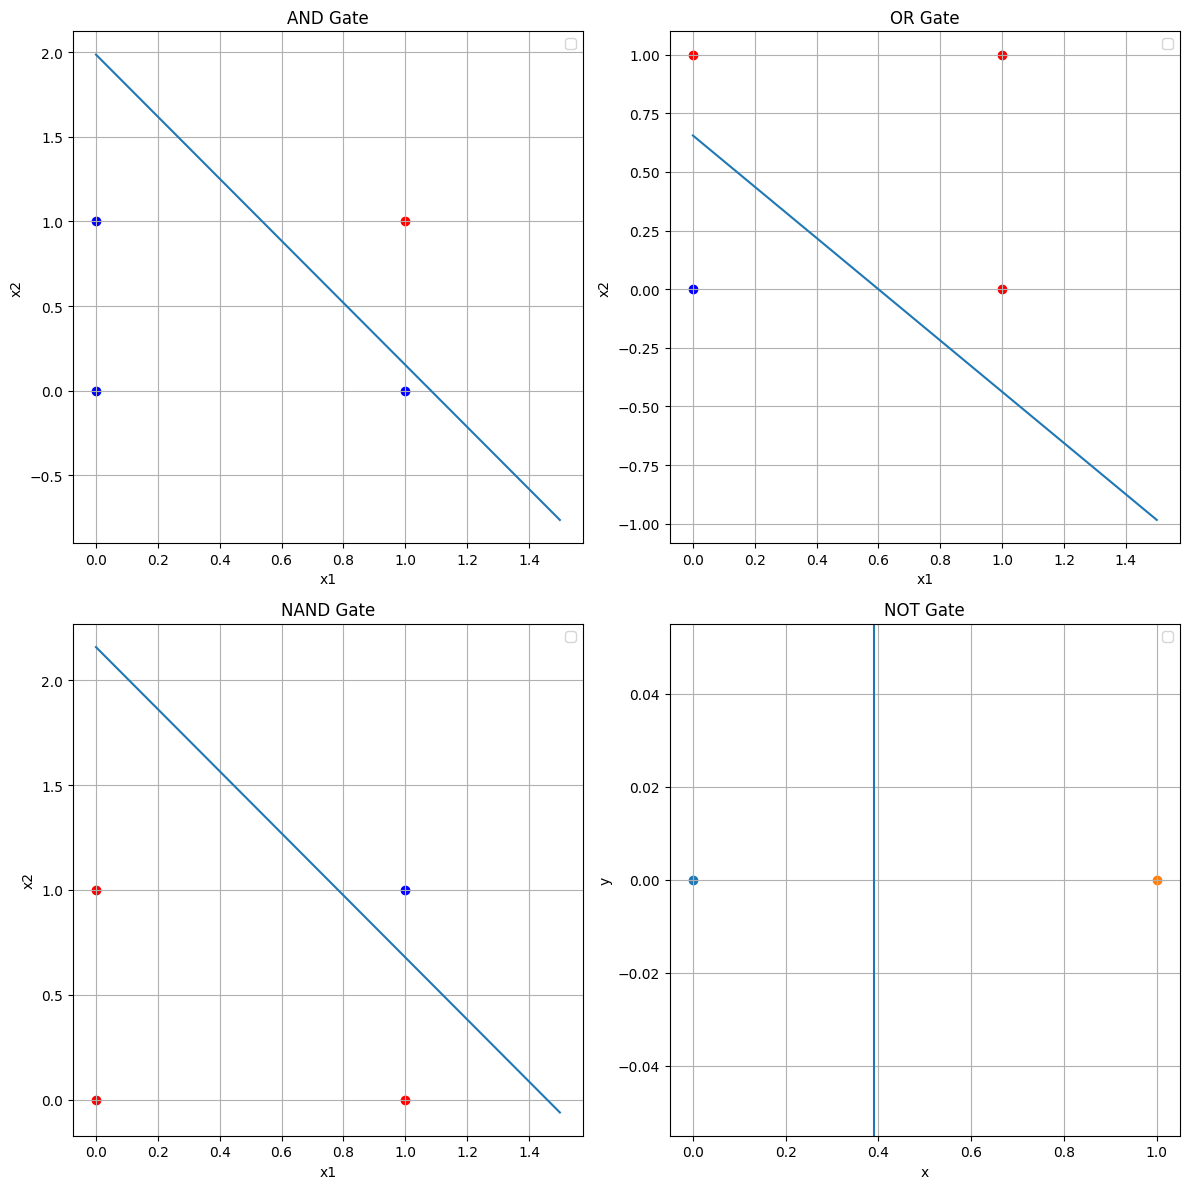

In [11]:
# decision boundary
def plot_decision_boundary(weights, bias, inputs, title, ax):
    w = np.array(weights)
    a = w[0] / w[1]
    b = -bias / w[1]
    x = np.array([0, 1, 1.5])

    for x_inputs in inputs:
        outs = perceptron(x_inputs, weights, bias)
        if outs == 1:
            ax.scatter(x_inputs[0], x_inputs[1], color='red')
        else :
            ax.scatter(x_inputs[0], x_inputs[1], color='blue')
    ax.plot(x, -(a * x) + b)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.legend()
    ax.set_title(title)
    ax.grid(True)

# outputs
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# AND Gate
plot_decision_boundary(weights_AND, bias_AND, inputs, 
                       title='AND Gate', ax=axs[0, 0])

# OR Gate
plot_decision_boundary(weights_OR, bias_OR, inputs, 
                       title='OR Gate', ax=axs[0, 1])

# NAND Gate
plot_decision_boundary(weights_NAND, bias_NAND, inputs, 
                       title='NAND Gate', ax=axs[1, 0])

# NOT Gate 
axs[1, 1].axvline(bias_NOT)
axs[1, 1].scatter(0, 0)
axs[1, 1].scatter(1, 0)
axs[1, 1].set_title('NOT Gate')
axs[1, 1].set_xlabel("x")
axs[1, 1].set_ylabel("y")
axs[1, 1].grid(True)
axs[1, 1].legend()

plt.tight_layout()
plt.savefig("Q3 a")
plt.show()

Learning rate 0.1

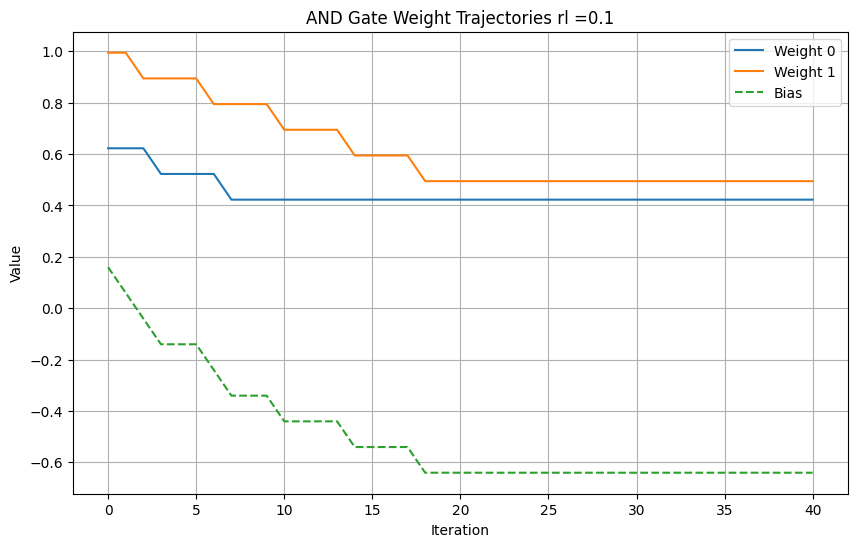

weights_AND:  [0.42268024 0.49467219]
bias_AND:  -0.6404416069014787


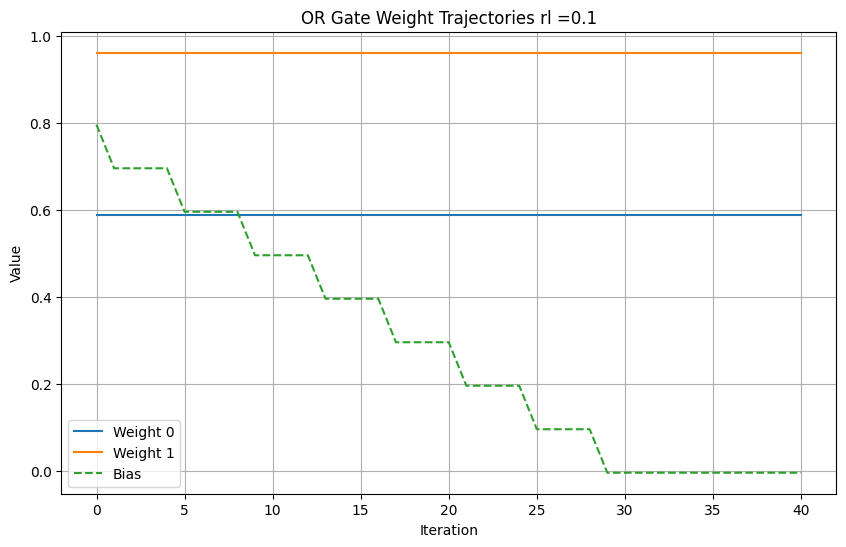

weights_OR:  [0.58883081 0.96241218]
bias_OR:  -0.0032785629508250425


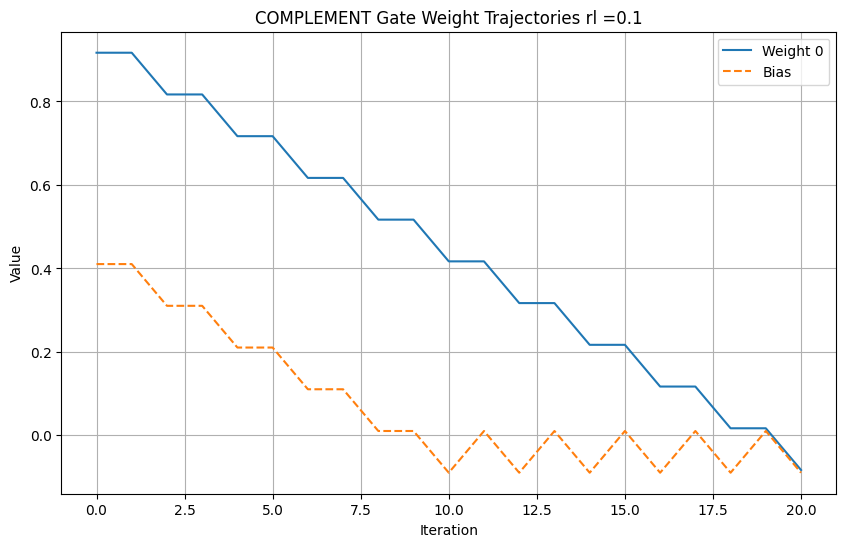

weights_NOT:  [-0.08314201]
bias_NOT:  -0.08965236158734047


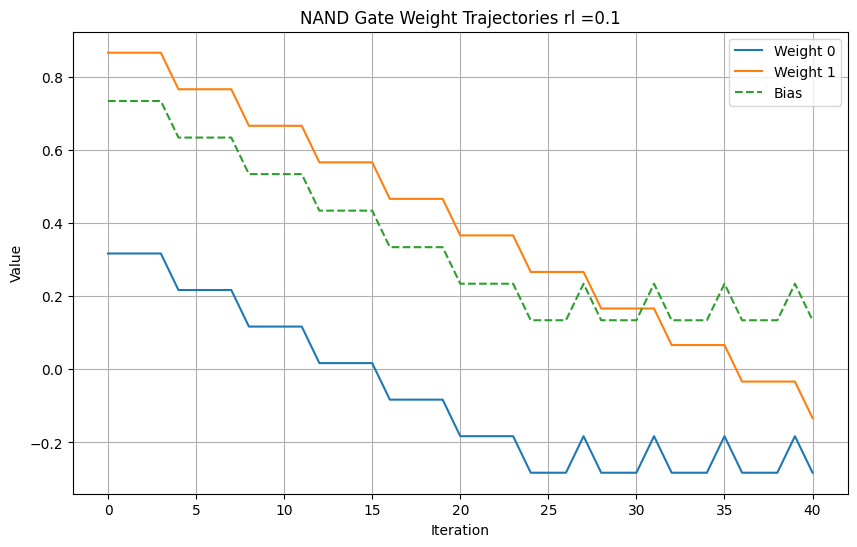

weights_NAND:  [-0.28300373 -0.13350284]
bias_NAND:  0.13429141839023123


In [5]:
# parameters
epochs = 10
learning_rate = 0.1

# AND gate
weights_AND, bias_AND, weight_history, bias_history = train_perceptron(inputs, AND_outputs, learning_rate, epochs)
plot_weight_trajectories(weight_history, bias_history, 'AND Gate Weight Trajectories rl ='+str(learning_rate))
print("weights_AND: ", weights_AND)
print("bias_AND: ", bias_AND)

#OR gate
weights_OR, bias_OR, weight_history, bias_history = train_perceptron(inputs, OR_outputs, learning_rate, epochs)
plot_weight_trajectories(weight_history, bias_history, 'OR Gate Weight Trajectories rl ='+str(learning_rate))
print("weights_OR: ", weights_OR)
print("bias_OR: ", bias_OR)

#COMPLEMENT gate
weights_NOT, bias_NOT, weight_history, bias_history = train_perceptron(NOT_inputs, NOT_outputs, learning_rate, epochs)
plot_weight_trajectories(weight_history, bias_history, 'COMPLEMENT Gate Weight Trajectories rl ='+str(learning_rate))
print("weights_NOT: ", weights_NOT)
print("bias_NOT: ", bias_NOT)

#NAND gate
weights_NAND, bias_NAND, weight_history, bias_history = train_perceptron(inputs, NAND_outputs, learning_rate, epochs)
plot_weight_trajectories(weight_history, bias_history, 'NAND Gate Weight Trajectories rl ='+str(learning_rate))
print("weights_NAND: ", weights_NAND)
print("bias_NAND: ", bias_NAND)

Learning rate 0.01

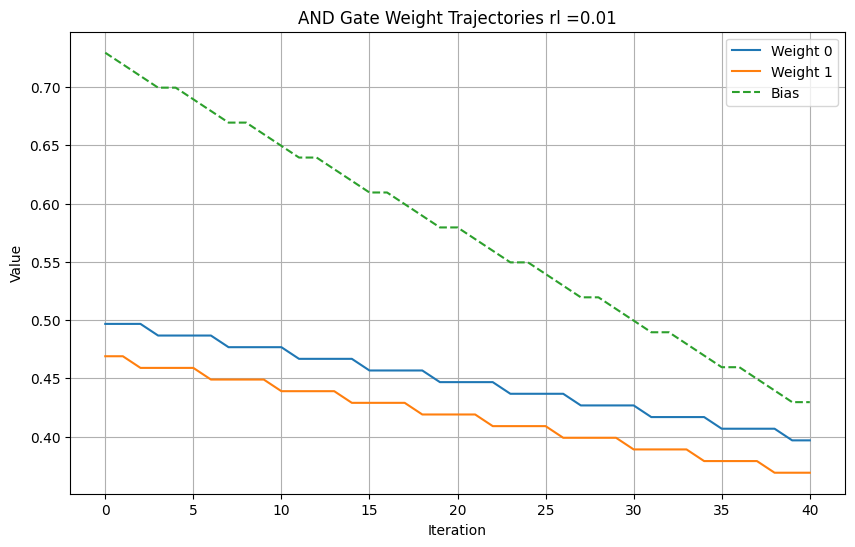

weights_AND:  [0.39668462 0.36890727]
bias_AND:  0.429502528202093


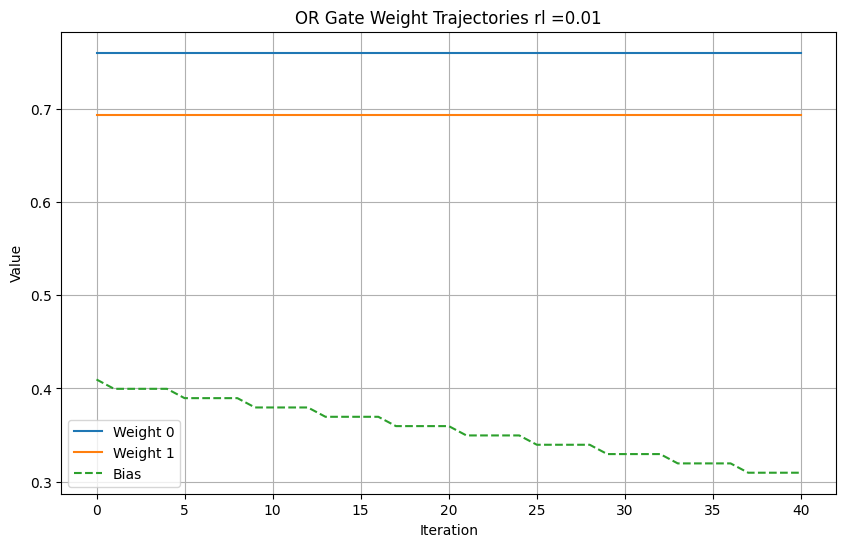

weights_OR:  [0.76010438 0.69339268]
bias_OR:  0.3095619946829561


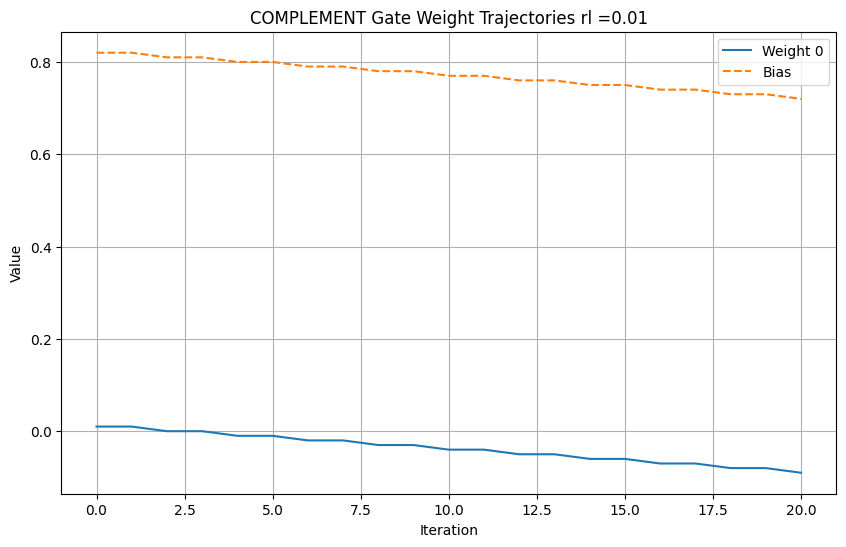

weights_NOT:  [-0.08997323]
bias_NOT:  0.7202570211562462


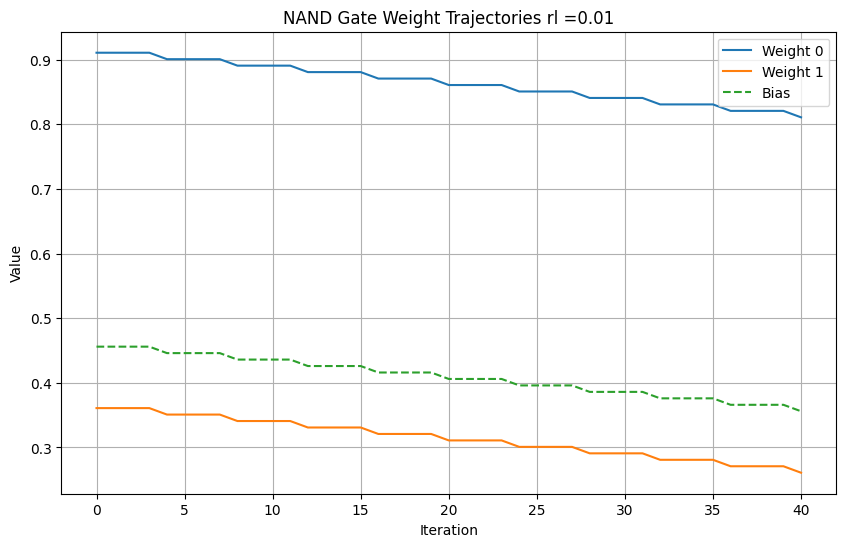

weights_NAND:  [0.81087638 0.26084287]
bias_NAND:  0.35595797418576225


In [6]:
# parameters
epochs = 10
learning_rate = 0.01

# AND gate
weights_AND, bias_AND, weight_history, bias_history = train_perceptron(inputs, AND_outputs, learning_rate, epochs)
plot_weight_trajectories(weight_history, bias_history, 'AND Gate Weight Trajectories rl ='+str(learning_rate))
print("weights_AND: ", weights_AND)
print("bias_AND: ", bias_AND)

#OR gate
weights_OR, bias_OR, weight_history, bias_history = train_perceptron(inputs, OR_outputs, learning_rate, epochs)
plot_weight_trajectories(weight_history, bias_history, 'OR Gate Weight Trajectories rl ='+str(learning_rate))
print("weights_OR: ", weights_OR)
print("bias_OR: ", bias_OR)

#COMPLEMENT gate
weights_NOT, bias_NOT, weight_history, bias_history = train_perceptron(NOT_inputs, NOT_outputs, learning_rate, epochs)
plot_weight_trajectories(weight_history, bias_history, 'COMPLEMENT Gate Weight Trajectories rl ='+str(learning_rate))
print("weights_NOT: ", weights_NOT)
print("bias_NOT: ", bias_NOT)

#NAND gate
weights_NAND, bias_NAND, weight_history, bias_history = train_perceptron(inputs, NAND_outputs, learning_rate, epochs)
plot_weight_trajectories(weight_history, bias_history, 'NAND Gate Weight Trajectories rl ='+str(learning_rate))
print("weights_NAND: ", weights_NAND)
print("bias_NAND: ", bias_NAND)

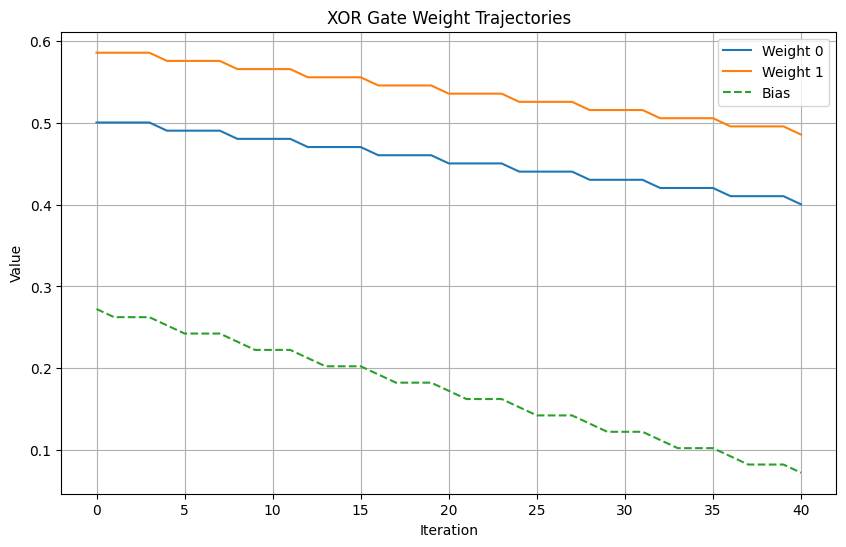

In [7]:
# XOR
XOR_outputs = [0, 1, 1, 0]

weights_XOR, bias_XOR, weight_history_XOR, bias_history_XOR = train_perceptron(inputs, XOR_outputs, learning_rate, epochs)

plot_weight_trajectories(weight_history_XOR, bias_history_XOR, 'XOR Gate Weight Trajectories')
